In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rc("font",size=50)
import seaborn as sns
plt.figure(figsize=(15,8))
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
finance=pd.read_csv(r"D:\Python\Jigsaw Academy\Financial ServicesMarketingDataset.csv")

<Figure size 1080x576 with 0 Axes>

In [44]:
finance.head()

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,responded
0,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,59,admin.,married,professional.course,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,24,technician,single,professional.course,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [45]:
finance.isnull().sum()

custAge           0
profession        0
marital           0
schooling         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
responded         0
dtype: int64

# There are no missing values in our data but there are unknowns in data hence will perform MVT

In [46]:
# Shape of the data
print("the number of rows in the data is ",finance.shape[0])
print("the number of features in the data is ",finance.shape[1])

the number of rows in the data is  37084
the number of features in the data is  20


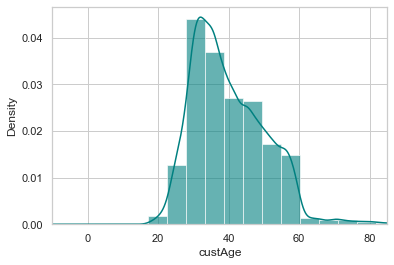

In [47]:
data=finance
ax = data["custAge"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
data["custAge"].plot(kind='density', color='teal')
ax.set(xlabel='custAge')
plt.xlim(-10,85)
plt.show()

# from the graph it is easily visible that people are maximum in the age group 30-40. There are very few people above 60 and very less people below 18

In [48]:
print('The mean of "Age" is %.2f' %(data["custAge"].mean(skipna=True)))
# median age
print('The median of "Age" is %.2f' %(data["custAge"].median(skipna=True)))

The mean of "Age" is 40.04
The median of "Age" is 38.00


admin.           9420
blue-collar      8314
technician       6096
services         3547
management       2637
retired          1541
entrepreneur     1309
self-employed    1276
housemaid         946
unemployed        925
student           767
unknown           306
Name: profession, dtype: int64


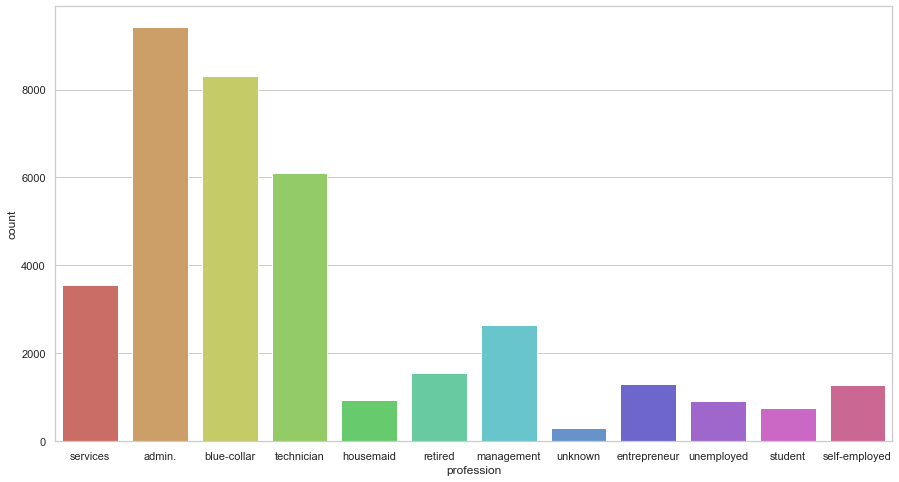

In [49]:
print(data['profession'].value_counts())
plt.figure(figsize=(15,8))
data['profession'].value_counts()
sns.countplot(x='profession',data=data,palette='hls')
plt.show()

# There are 306 unknown whose profession is not known . We can impute these unknown with mode of the data

In [50]:
#Replacing unknown with admin
data['profession'].replace({"unknown":"admin."},inplace=True)
print(data['profession'].value_counts())

admin.           9726
blue-collar      8314
technician       6096
services         3547
management       2637
retired          1541
entrepreneur     1309
self-employed    1276
housemaid         946
unemployed        925
student           767
Name: profession, dtype: int64


In [51]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

married     22479
single      10407
divorced     4126
unknown        72
Name: marital, dtype: int64


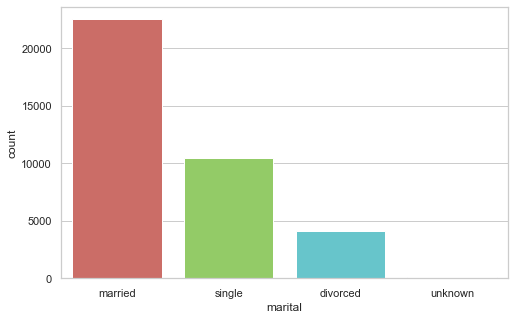

In [52]:
print(data['marital'].value_counts())
plt.figure(figsize=(8,5))
data['marital'].value_counts()
sns.countplot(x='marital',data=data,palette='hls')
plt.show()

In [53]:
#Replacing unknown with married in marital
data['marital'].replace({"unknown":"married"},inplace=True)
print(data['marital'].value_counts())


married     22551
single      10407
divorced     4126
Name: marital, dtype: int64


university.degree      10971
high.school             8542
basic.9y                5421
professional.course     4746
basic.4y                3765
basic.6y                2074
unknown                 1549
illiterate                16
Name: schooling, dtype: int64


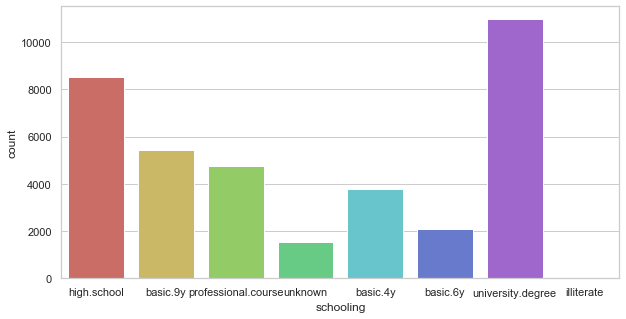

In [54]:
print(data['schooling'].value_counts())
plt.figure(figsize=(10,5))
data['schooling'].value_counts()
sns.countplot(x='schooling',data=data,palette='hls')
plt.show()

# unknown contributes to a significant amount in schooling. We will replace it with university degree . Also from graph it is easily visible that maximum number of people are from high school and university degree

In [55]:
#Replacing unknown with married in marital
data['schooling'].replace({"unknown":"university.degree"},inplace=True)
print(data['schooling'].value_counts())

university.degree      12520
high.school             8542
basic.9y                5421
professional.course     4746
basic.4y                3765
basic.6y                2074
illiterate                16
Name: schooling, dtype: int64


In [56]:
print(data['default'].value_counts())
print(data['housing'].value_counts())
print(data['loan'].value_counts())
print(data['month'].value_counts())
print(data['day_of_week'].value_counts())
print(data['campaign'].value_counts())
print(data['poutcome'].value_counts())
print(data['responded '].value_counts())

no         29382
unknown     7700
yes            2
Name: default, dtype: int64
yes        19433
no         16769
unknown      882
Name: housing, dtype: int64
no         30561
yes         5641
unknown      882
Name: loan, dtype: int64
may    12420
jul     6430
aug     5562
jun     4786
nov     3705
apr     2388
oct      630
sep      510
mar      487
dec      166
Name: month, dtype: int64
thu    7778
mon    7671
wed    7341
tue    7262
fri    7032
Name: day_of_week, dtype: int64
1     15883
2      9532
3      4777
4      2389
5      1441
6       873
7       580
8       360
9       260
10      196
11      165
12      118
13       88
14       62
17       49
16       45
15       41
18       32
20       28
19       25
21       24
24       14
23       14
22       14
27        9
28        8
29        8
26        7
30        6
25        6
31        6
33        4
35        4
32        4
34        3
40        2
43        2
37        1
39        1
41        1
42        1
56        1
Name: campaign

In [57]:
data['housing'].replace({"unknown":"yes"},inplace=True)
print(data['housing'].value_counts())

data['loan'].replace({"unknown":"no"},inplace=True)
print(data['loan'].value_counts())

yes    20315
no     16769
Name: housing, dtype: int64
no     31443
yes     5641
Name: loan, dtype: int64


# we are not changing "unknown" in default as there are only two cases with yes so will keep it as it separate category. We will change housing and loan "unknown" with mode so that our accuracy will be more.

In [58]:
print("The percentage of client not subscribing is",len(data[data['responded ']=="no"])/finance.shape[0]*100)
print("The percentage of client  subscribing is",len(data[data['responded ']=="yes"])/finance.shape[0]*100)


# drawing relationship between profession marital schooling , loan and responded
pd.set_option("display.max_rows", None, "display.max_columns", None)
data.groupby(['profession','marital','loan'])['responded '].value_counts()

The percentage of client not subscribing is 88.65278826448065
The percentage of client  subscribing is 11.34721173551936


profession     marital   loan  responded 
admin.         divorced  no    no             888
                               yes            101
                         yes   no             154
                               yes             18
               married   no    no            3663
                               yes            514
                         yes   no             735
                               yes            104
               single    no    no            2487
                               yes            473
                         yes   no             518
                               yes             71
blue-collar    divorced  no    no             504
                               yes             44
                         yes   no              80
                               yes              4
               married   no    no            4783
                               yes            334
                         yes   no             859
        

# There are a lot of categories under profession and schooling . We will try to reduce it for simplicity and analysis

In [59]:
data['schooling']=np.where(data['schooling'] =='basic.9y', 'Basic', data['schooling'])
data['schooling']=np.where(data['schooling'] =='basic.6y', 'Basic', data['schooling'])
data['schooling']=np.where(data['schooling'] =='basic.4y', 'Basic', data['schooling'])

In [60]:
data['schooling'].unique()

array(['high.school', 'Basic', 'professional.course', 'university.degree',
       'illiterate'], dtype=object)

In [61]:
data.groupby('responded ').mean()

,custAge,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
responded,,,,,,,,,
no,39.924930,2.636300,984.354027,0.131950,0.251208,93.604276,-40.595367,3.813837,5176.272816
yes,40.962928,2.048004,792.032082,0.493584,-1.234078,93.355761,-39.800594,2.120299,5095.070913


The average age of customers who bought the term deposit is higher than that of the customers who didn’t. Also campaign and pdays are lower for person who bought term deposit . • previous: "number of contacts performed before this campaign and for this client " is more for person who bought term deposit

In [62]:
data.groupby('schooling').mean()

,custAge,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
schooling,,,,,,,,,
Basic,42.143606,2.551687,975.545737,0.140764,0.188544,93.639856,-40.923730,3.725610,5171.815933
high.school,38.041442,2.582065,963.901311,0.185437,0.038164,93.585129,-40.945551,3.560872,5165.224936
illiterate,49.812500,2.312500,936.937500,0.125000,0.037500,93.394438,-40.356250,3.649250,5176.250000
professional.course,40.100506,2.581753,960.107248,0.166035,0.178993,93.572667,-40.147809,3.716220,5170.432301
university.degree,39.484265,2.572764,950.842173,0.196166,-0.018642,93.514063,-39.963970,3.533789,5162.740655


the person who are illiterate are older than all other categories in schooling. Campaign is also lower for these people and previous contact is also lower . More campaign had to be done on people who have completed high school graduation

In [63]:
data.groupby('profession').mean()

,custAge,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
profession,,,,,,,,,
admin.,38.444170,2.620913,952.447563,0.190212,0.019967,93.536946,-40.203455,3.555792,5164.181719
blue-collar,39.519605,2.549916,985.865408,0.122324,0.246993,93.656934,-41.369148,3.768899,5175.375956
entrepreneur,41.754011,2.509549,981.554622,0.140565,0.145149,93.603048,-41.291826,3.772824,5175.652941
housemaid,45.455603,2.671247,960.154334,0.136364,0.439958,93.679817,-39.489323,4.012191,5179.474207
management,42.487675,2.476678,961.705347,0.185438,-0.016041,93.524078,-40.514486,3.607024,5166.607584
retired,62.115509,2.463335,899.082414,0.321220,-0.689942,93.438587,-38.644646,2.777762,5122.790720
self-employed,39.981975,2.690439,978.756270,0.142633,0.111834,93.567466,-40.507759,3.703358,5171.011991
services,37.939667,2.606146,979.954610,0.152805,0.174852,93.634483,-41.249422,3.701426,5171.607246
student,25.923077,2.108214,834.671447,0.534550,-1.408605,93.334140,-40.242503,1.877193,5085.546675


campaign was done least for the students and maximum for self employed people. Thus we can say that students are more easy to convince than other people. Further pdays are also less for students and previous is maximum so it is fresh in their memory

# We will start Bivariate Analysis now


Text(0, 0.5, 'No of customers')

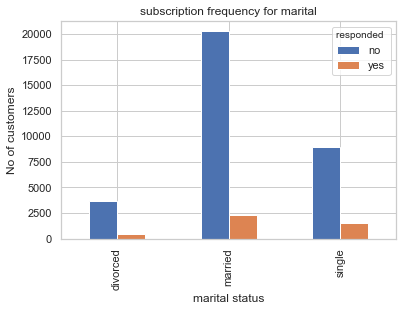

In [64]:
%matplotlib inline
a=data["responded "]
pd.crosstab(data.marital,a ).plot(kind='bar')
plt.title('subscription frequency for marital')
plt.xlabel('marital status')
plt.ylabel('No of customers')


people who are  married are less likely to buy subscription

Text(0, 0.5, 'No of customers')

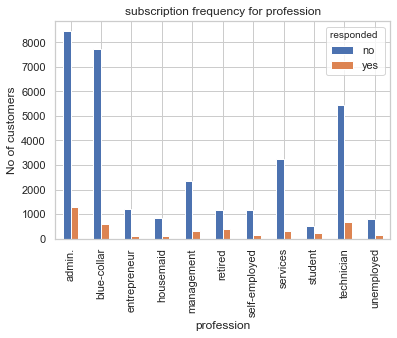

In [65]:
%matplotlib inline
a=data["responded "]
pd.crosstab(data.profession,a ).plot(kind='bar')
plt.title('subscription frequency for profession')
plt.xlabel('profession')
plt.ylabel('No of customers')

Most people who don't buy subscription belong to admin blue collar ,technician and services. The data is not much clear and we cannot say this person is more likely to subscribe or not. we need to dig up more

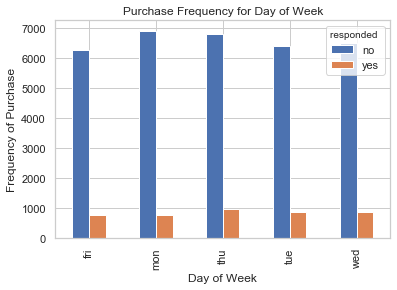

In [66]:
a=data["responded "]
pd.crosstab(data.day_of_week,a).plot(kind='bar')
plt.title('Purchase Frequency for Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Frequency of Purchase')

plt.savefig('pur_dayofweek_bar')

We cannot conclude from purchase day that policy will sell more or less on a particular day .

Text(0, 0.5, 'Frequency of Purchase')

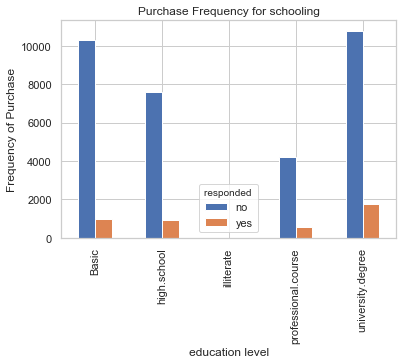

In [67]:
a=data["responded "]
pd.crosstab(data.schooling,a).plot(kind='bar')
plt.title('Purchase Frequency for schooling')
plt.xlabel('education level')
plt.ylabel('Frequency of Purchase')

Those who have completed basic education have bought more policy . We can say schooling is a better indicator

# Now converting the values in dummy variables for categorical data

In [68]:
data['responded ']=np.where(data['responded '] =='no', 0, data['responded '])
#data['profession'].replace({"unknown":"admin."},inplace=True)
#print(data['profession'].value_counts())
data['responded ']=np.where(data['responded '] =='yes', 1, data['responded '])

In [69]:
data['default'].replace({"unknown":"no"},inplace=True)
print(data['default'].value_counts())

no     37082
yes        2
Name: default, dtype: int64


In [70]:
data.head()

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,responded
0,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,45,services,married,Basic,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,59,admin.,married,professional.course,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,41,blue-collar,married,university.degree,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,24,technician,single,professional.course,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


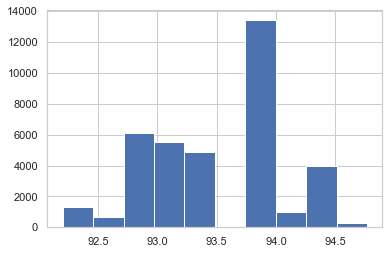

In [71]:
data['cons.price.idx'].hist()

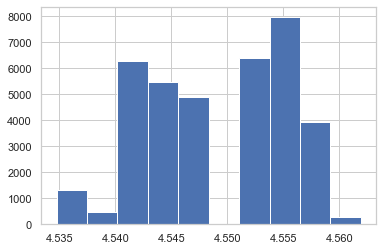

In [72]:
data['cons.price.idx'] = np.log(data['cons.price.idx']+1)
data['cons.price.idx'].hist()

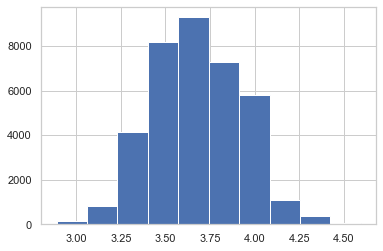

In [73]:
data['custAge'] = np.log(data['custAge']+1)
data['custAge'].hist()

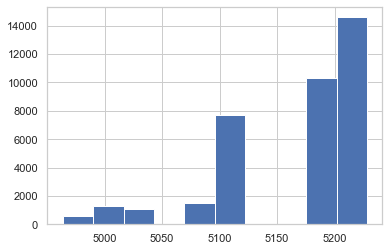

In [79]:

data['euribor3m'] = np.log(data['euribor3m']+1)
data['euribor3m'] = np.log(data['euribor3m']+1)

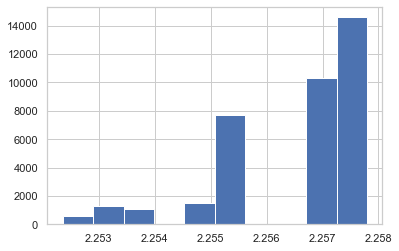

In [81]:
data['nr.employed'] = np.log(data['nr.employed']+1)
data['nr.employed'].hist()

In [82]:
data.columns

Index(['custAge', 'profession', 'marital', 'schooling', 'default', 'housing',
       'loan', 'contact', 'month', 'day_of_week', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'responded '],
      dtype='object')

In [86]:
#created dummy variables from categories (also can use OneHotEncoder)
data_dummy = pd.get_dummies(data[['profession','marital','schooling','default','housing','loan','contact',
                                  'month','day_of_week','poutcome']],drop_first=True)

In [87]:
data_dummy.columns

Index(['profession_blue-collar', 'profession_entrepreneur',
       'profession_housemaid', 'profession_management', 'profession_retired',
       'profession_self-employed', 'profession_services', 'profession_student',
       'profession_technician', 'profession_unemployed', 'marital_married',
       'marital_single', 'schooling_high.school', 'schooling_illiterate',
       'schooling_professional.course', 'schooling_university.degree',
       'default_yes', 'housing_yes', 'loan_yes', 'contact_telephone',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_mon',
       'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed',
       'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')

In [88]:
data_dummy.head()

,profession_blue-collar,profession_entrepreneur,profession_housemaid,profession_management,profession_retired,profession_self-employed,profession_services,profession_student,profession_technician,profession_unemployed,marital_married,marital_single,schooling_high.school,schooling_illiterate,schooling_professional.course,schooling_university.degree,default_yes,housing_yes,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0


In [89]:
cat_vars=['profession','marital','schooling','default','housing','loan','contact','month','day_of_week','poutcome']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]


In [90]:
to_keep

['custAge',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'responded ']

In [93]:
data1=data.join(data_dummy)

In [97]:
cat_vars=['profession','marital','schooling','default','housing','loan','contact','month','day_of_week','poutcome']
data_vars=data1.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [100]:
data_final=data1[to_keep]
data_final.columns.values

array(['custAge', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'responded ', 'profession_blue-collar', 'profession_entrepreneur',
       'profession_housemaid', 'profession_management',
       'profession_retired', 'profession_self-employed',
       'profession_services', 'profession_student',
       'profession_technician', 'profession_unemployed',
       'marital_married', 'marital_single', 'schooling_high.school',
       'schooling_illiterate', 'schooling_professional.course',
       'schooling_university.degree', 'default_yes', 'housing_yes',
       'loan_yes', 'contact_telephone', 'month_aug', 'month_dec',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed', 'poutcome_nonexistent',
       'poutcome_success'], dtype=object)

In [101]:
from sklearn.preprocessing import StandardScaler ,LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression 
from sklearn import svm 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.metrics import confusion_matrix ,classification_report

In [102]:
data_final.head()

,custAge,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,responded,profession_blue-collar,profession_entrepreneur,profession_housemaid,profession_management,profession_retired,profession_self-employed,profession_services,profession_student,profession_technician,profession_unemployed,marital_married,marital_single,schooling_high.school,schooling_illiterate,schooling_professional.course,schooling_university.degree,default_yes,housing_yes,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,4.043051,1,999,0,1.1,4.553814,-36.4,0.702104,2.257051,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
1,3.828641,1,999,0,1.1,4.553814,-36.4,0.702104,2.257051,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
2,4.094345,1,999,0,1.1,4.553814,-36.4,0.702104,2.257051,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
3,3.737670,1,999,0,1.1,4.553814,-36.4,0.702104,2.257051,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
4,3.218876,1,999,0,1.1,4.553814,-36.4,0.702104,2.257051,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0


In [105]:
scale = StandardScaler()
data_dummies_scaled = data_final.copy()
data_dummies_scaled[['custAge','campaign','pdays','previous','emp.var.rate','cons.price.idx','euribor3m','nr.employed']]= scale.fit_transform(data_dummies_scaled[['custAge','campaign','pdays','previous','emp.var.rate','cons.price.idx','euribor3m','nr.employed']])
data_dummies_scaled.head()

,custAge,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,responded,profession_blue-collar,profession_entrepreneur,profession_housemaid,profession_management,profession_retired,profession_self-employed,profession_services,profession_student,profession_technician,profession_unemployed,marital_married,marital_single,schooling_high.school,schooling_illiterate,schooling_professional.course,schooling_university.degree,default_yes,housing_yes,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,1.452087,-0.566505,0.195262,-0.34899,0.648404,0.723384,-36.4,0.691207,0.335775,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
1,0.585727,-0.566505,0.195262,-0.34899,0.648404,0.723384,-36.4,0.691207,0.335775,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
2,1.659346,-0.566505,0.195262,-0.34899,0.648404,0.723384,-36.4,0.691207,0.335775,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
3,0.218141,-0.566505,0.195262,-0.34899,0.648404,0.723384,-36.4,0.691207,0.335775,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
4,-1.878134,-0.566505,0.195262,-0.34899,0.648404,0.723384,-36.4,0.691207,0.335775,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0


In [106]:
data_final_vars=data_dummies_scaled.columns.values.tolist()
y=data_dummies_scaled['responded ']
X=[i for i in data_final_vars if i not in y]
X=data_dummies_scaled[X]


In [114]:
del X['responded ']

In [115]:
X.head()

,custAge,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,profession_blue-collar,profession_entrepreneur,profession_housemaid,profession_management,profession_retired,profession_self-employed,profession_services,profession_student,profession_technician,profession_unemployed,marital_married,marital_single,schooling_high.school,schooling_illiterate,schooling_professional.course,schooling_university.degree,default_yes,housing_yes,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,1.452087,-0.566505,0.195262,-0.34899,0.648404,0.723384,-36.4,0.691207,0.335775,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
1,0.585727,-0.566505,0.195262,-0.34899,0.648404,0.723384,-36.4,0.691207,0.335775,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
2,1.659346,-0.566505,0.195262,-0.34899,0.648404,0.723384,-36.4,0.691207,0.335775,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
3,0.218141,-0.566505,0.195262,-0.34899,0.648404,0.723384,-36.4,0.691207,0.335775,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
4,-1.878134,-0.566505,0.195262,-0.34899,0.648404,0.723384,-36.4,0.691207,0.335775,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0


In [116]:
y=y.astype('int')
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(X, y)
print(rfe.support_)
print(rfe.ranking_)

[False False  True False  True  True False  True  True  True False False
 False  True False False  True False False False False False False False
 False False False False  True  True  True  True  True  True  True False
  True  True  True False False False  True  True]
[20  3  1 19  1  1 17  1  1  1  5  2  7  1  9  4  1 23 24 18 13 15 25 16
  8 22 14 21  1  1  1  1  1  1  1 10  1  1  1 11 12  6  1  1]


In [117]:
print('Selected features: %s' % list(X.columns[rfe.support_]))

Selected features: ['pdays', 'emp.var.rate', 'cons.price.idx', 'euribor3m', 'nr.employed', 'profession_blue-collar', 'profession_retired', 'profession_student', 'contact_telephone', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_oct', 'month_sep', 'day_of_week_mon', 'poutcome_nonexistent', 'poutcome_success']


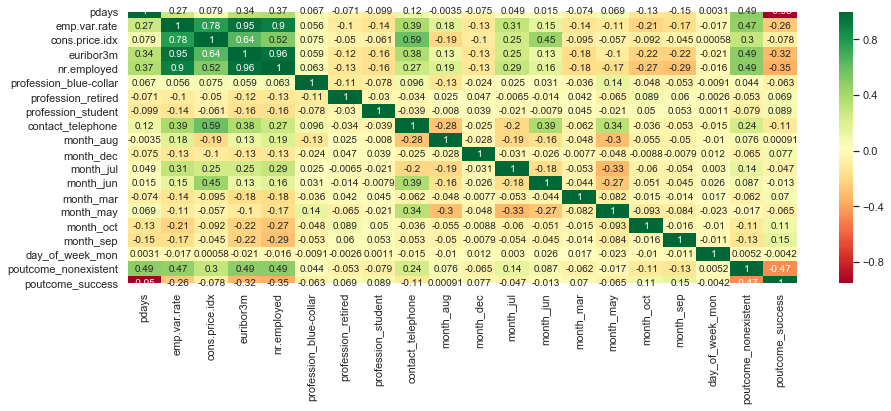

In [119]:
Selected_features = ['pdays', 'emp.var.rate', 'cons.price.idx', 'euribor3m', 'nr.employed', 
                     'profession_blue-collar', 'profession_retired', 'profession_student', 
                     'contact_telephone', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 
                     'month_mar', 'month_may', 'month_oct', 'month_sep', 'day_of_week_mon', 
                     'poutcome_nonexistent', 'poutcome_success']
X = data_dummies_scaled[Selected_features]

plt.subplots(figsize=(15, 5))
sns.heatmap(X.corr(), annot=True, cmap="RdYlGn")
plt.show()

Train/Test split results:
LogisticRegression accuracy is 0.896
LogisticRegression log_loss is 0.278
LogisticRegression auc is 0.809


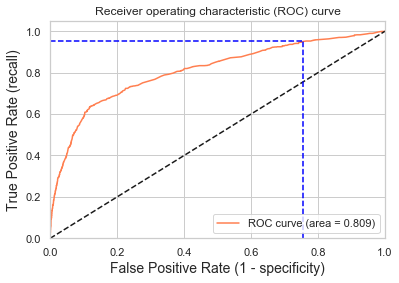

Using a threshold of 0.037 guarantees a sensitivity of 0.950 and a specificity of 0.245, i.e. a false positive rate of 75.52%.


In [120]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

# create X (features) and y (response)
X = data_dummies_scaled[Selected_features]
y = data_dummies_scaled['responded ']
y=y.astype('int')
# use train/test split with different random_state values
# we can change the random_state values that changes the accuracy scores
# the scores change a lot, this is why testing scores is a high-variance estimate
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# check classification scores of logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Train/Test split results:')
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))


In [122]:
lr = LogisticRegression(max_iter = 2000)
lr_cv = cross_val_score(lr,X_train,y_train,cv=5)
print(lr_cv)
print(lr_cv.mean())

[0.90208965 0.89821368 0.9019046  0.90207315 0.89937637]
0.9007314915443553


In [124]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
dt = tree.DecisionTreeClassifier(random_state = 1)
dt_cv = cross_val_score(dt,X_train,y_train,cv=5)
print(dt_cv)
print(dt_cv.mean())

[0.8950118  0.89484328 0.89347716 0.89752233 0.89128603]
0.8944281188244576


In [125]:
knn = KNeighborsClassifier()
knn_cv = cross_val_score(knn,X_train,y_train,cv=5)
print(knn_cv)
print(knn_cv.mean())

[0.8958544  0.87815976 0.87898197 0.88403843 0.88016181]
0.8834392713920204


In [127]:
rf = RandomForestClassifier(random_state = 1)
rf_cv_scaled = cross_val_score(rf,X_train,y_train,cv=5)
print(rf_cv_scaled)
print(rf_cv_scaled.mean())

[0.89804516 0.89366363 0.89027473 0.89718524 0.89179167]
0.8941920880230316


In [128]:
print(f'{lr_cv.mean()} is the value obained by the logistic regression')
print()
print(f'{dt_cv.mean()} is the value obained by the decision tree classifier')
print()
print(f'{knn_cv.mean()} is the value obained by the k-nearest neighbors classifier')
print()
print(f'{rf_cv_scaled.mean()} is the value obained by the random forest classifier')
print()


0.9007314915443553 is the value obained by the logistic regression

0.8944281188244576 is the value obained by the decision tree classifier

0.8834392713920204 is the value obained by the k-nearest neighbors classifier

0.8941920880230316 is the value obained by the random forest classifier

